In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re

In [2]:
# CSV 파일 불러오기
file_path = '../data/review_page3_data_analyze_with_groups.csv'  # 업로드된 파일 경로
data_with_groups = pd.read_csv(file_path)

# 데이터프레임의 첫 몇 행 확인
data_with_groups.head()


,Unnamed: 0,data_no,name,date,product,detail,score,review,help_cnt,style_cnt,...,category,sex,price,tag,sentiment,score_category,sentiment_label,match,confidence,group
0,0,3252823,LV.3 호비수리야,2023.04.28,Mutan 5Color 피셔맨 플랫 샌들 3Cm,Mocha/245,5.0,어깨부터 발끝까지 나왔어요 ㅋㅋ\n이번주가 쌀쌀해서 검정옷이랑 입었지만\n더워지면 ...,4,1.0,...,샌들,여성,85000,"사이즈-보통이에요, 밝기-보통이에요, 색감-보통이에요, 발볼-보통이에요, 착화감-적...","{'label': 'LABEL_1', 'score': 0.5275529623031616}",positive,positive,True,0.527553,Positive Score and Positive Sentiment
1,1,3252823,LV.4 청아롱,2023.08.15,Mutan 5Color 피셔맨 플랫 샌들 3Cm,Black/245,5.0,통풍도 잘되고 시원해서 여름에 신기 딱 좋아요.\n원피스에도 잘어울리고 바지에도 잘...,1,2.0,...,샌들,여성,85000,"사이즈-보통이에요, 밝기-보통이에요, 색감-보통이에요, 발볼-보통이에요, 착화감-적...","{'label': 'LABEL_1', 'score': 0.5083227753639221}",positive,positive,True,0.508323,Positive Score and Positive Sentiment
2,2,3252823,LV.6 몽봉추,2023.06.05,Mutan 5Color 피셔맨 플랫 샌들 3Cm,Black/245,5.0,생각보다 편하고 밑창이 살짝 푹신해서 좋아요~ 올여름에 잘 신고다닐거같아요,0,3.0,...,샌들,여성,85000,"사이즈-보통이에요, 밝기-보통이에요, 색감-선명해요, 발볼-보통이에요, 착화감-편안...","{'label': 'LABEL_0', 'score': 0.5062161087989807}",positive,negative,False,0.506216,Positive Score and Negative Sentiment
3,3,3252823,LV.3 솔직한분홍린넨,2023.05.26,Mutan 5Color 피셔맨 플랫 샌들 3Cm,Cream/245,5.0,너무 편하고 이뻐요. 밝은색 샌들을 찾다가 봤는데 발이 너무 커보이면 어쩌지 힜는데...,0,3.0,...,샌들,여성,85000,"사이즈-보통이에요, 밝기-밝아요, 색감-선명해요, 발볼-보통이에요, 착화감-편안해요...","{'label': 'LABEL_0', 'score': 0.5063436031341553}",positive,negative,False,0.506344,Positive Score and Negative Sentiment
4,4,3252823,LV.3 펭솜이,2023.06.21,Mutan 5Color 피셔맨 플랫 샌들 3Cm,Cream/230,5.0,예뻐요! 평소에 신발 230 신는데 이 신발은 거의 딱 맞는 걸로 봐선 정사이즈 같...,0,2.0,...,샌들,여성,85000,"사이즈-보통이에요, 밝기-밝아요, 색감-선명해요, 발볼-보통이에요, 착화감-편안해요...","{'label': 'LABEL_1', 'score': 0.508301317691803}",positive,positive,True,0.508301,Positive Score and Positive Sentiment


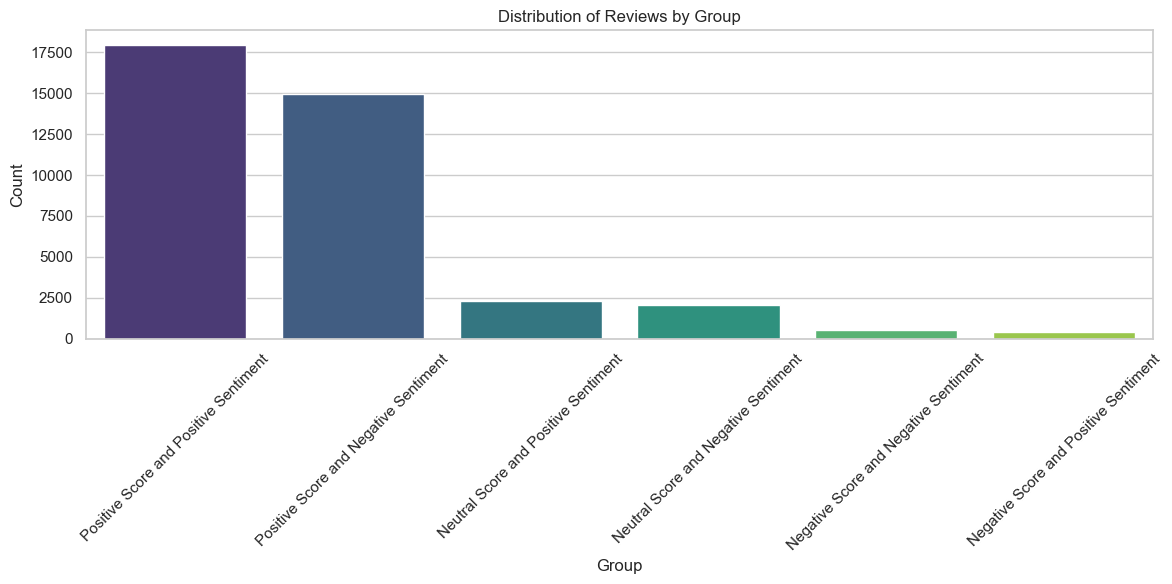

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# 그룹별 분포 계산
group_distribution = data_with_groups['group'].value_counts()

# 그룹별 분포 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=group_distribution.index, y=group_distribution.values, palette="viridis")
plt.title('Distribution of Reviews by Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
    --------------------------------------- 0.1/2.6 MB 1.6 MB/s eta 0:00:02
   - -------------------------------------- 0.1/2.6 MB 2.6 MB/s eta 0:00:01
   ------ --------------------------------- 0.4/2.6 MB 3.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.6 MB 4.2 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.6 MB 4.4 MB/s eta 0:00:01
   -------------------- ------------------- 1.3/2.6 MB 5.2 MB/s eta 0:00:01
   ---------------------- ----------------- 1.5/2.6 MB 4.9 MB/s eta 0:00:01
   ------------------------- -------------- 1.6/2.6 MB 4.8 MB/s eta 0:00:01
   ---------------------------- ----------- 1.9/2.6 MB 4.7 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 4.8 MB/s eta 0:00:01
   ----------------------------------- ---- 2.3/2.6 MB 4.7 MB/s eta 0:00:01
   ------------------------------------- -- 2.4/2.6 MB 4.6 MB/s eta 0:00:01
   ----------------

In [8]:
import pyLDAvis
import pyLDAvis.sklearn

In [9]:
# 1. Positive Score and Negative Sentiment 그룹 필터링
negative_sentiment_data = data_with_groups[data_with_groups['group'] == 'Positive Score and Negative Sentiment']

# "사이즈"라는 단어가 포함된 리뷰만 추출
size_related_reviews = negative_sentiment_data[negative_sentiment_data['review'].str.contains('사이즈', na=False)]

# 리뷰 텍스트 데이터 추출
reviews = size_related_reviews['review'].dropna().values

# 2. 데이터 전처리
def preprocess_text(text):
    text = re.sub(r'\n', ' ', text)  # 줄바꿈 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.lower()  # 소문자 변환
    return text

processed_reviews = [preprocess_text(review) for review in reviews]

# 3. LDA 모델링
# CountVectorizer를 사용하여 문서-단어 행렬 생성
vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=2)
doc_term_matrix = vectorizer.fit_transform(processed_reviews)

# LDA 모델 학습 (주제 3개로 설정)
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_model.fit(doc_term_matrix)

# 각 주제의 상위 단어를 출력하는 함수 정의
def print_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic #{topic_idx}: {' '.join(top_words[topic_idx])}")
    return top_words

# 상위 10개의 단어 출력
n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
top_words = print_top_words(lda_model, tf_feature_names, n_top_words)
top_words

Topic #0: 사이즈 사이즈는 크게 사이즈가 정사이즈로 같아요 조금 신고 살짝 정사이즈
Topic #1: 너무 사이즈는 사이즈도 좋아요 사이즈 정사이즈 편하고 마음에 좋고 반사이즈
Topic #2: 사이즈 같아요 사이즈가 너무 평소 신는데 작게 크게 신고 조금


{0: ['사이즈', '사이즈는', '크게', '사이즈가', '정사이즈로', '같아요', '조금', '신고', '살짝', '정사이즈'],
 1: ['너무', '사이즈는', '사이즈도', '좋아요', '사이즈', '정사이즈', '편하고', '마음에', '좋고', '반사이즈'],
 2: ['사이즈', '같아요', '사이즈가', '너무', '평소', '신는데', '작게', '크게', '신고', '조금']}

각 주제에서 "사이즈"와 관련된 피드백을 요약해보면:

Topic #0: 사이즈가 크거나 정사이즈로 평가되며, "조금" 크거나 작다는 표현이 보입니다.
Topic #1: "사이즈는"과 "사이즈도"라는 표현이 자주 등장하며, 편하고 마음에 든다는 긍정적인 피드백이 포함되어 있습니다.
Topic #2: "사이즈가" 작거나 크다는 피드백과 함께 "같아요"와 "너무"라는 표현이 보입니다.

In [11]:
# 1. Positive Score and Negative Sentiment 그룹 필터링
negative_sentiment_data = data_with_groups[data_with_groups['group'] == 'Positive Score and Negative Sentiment']

# "사이즈"라는 단어가 포함된 리뷰만 추출
size_related_reviews = negative_sentiment_data[negative_sentiment_data['review'].str.contains('생각보다', na=False)]

# 리뷰 텍스트 데이터 추출
reviews = size_related_reviews['review'].dropna().values

# 2. 데이터 전처리
def preprocess_text(text):
    text = re.sub(r'\n', ' ', text)  # 줄바꿈 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.lower()  # 소문자 변환
    return text

processed_reviews = [preprocess_text(review) for review in reviews]

# 3. LDA 모델링
# CountVectorizer를 사용하여 문서-단어 행렬 생성
vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=2)
doc_term_matrix = vectorizer.fit_transform(processed_reviews)

# LDA 모델 학습 (주제 3개로 설정)
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_model.fit(doc_term_matrix)

# 각 주제의 상위 단어를 출력하는 함수 정의
def print_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic #{topic_idx}: {' '.join(top_words[topic_idx])}")
    return top_words

# 상위 10개의 단어 출력
n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
top_words = print_top_words(lda_model, tf_feature_names, n_top_words)
top_words

Topic #0: 너무 좋아요 신고 편하고 사이즈가 많이 처음 같아요 조금 않고
Topic #1: 같아요 발이 좋습니다 너무 좋고 다른 엄청 착화감 편하고 편합니다
Topic #2: 너무 사이즈 같아요 신발 신는데 신으면 조금 살짝 사이즈는 편하게


{0: ['너무', '좋아요', '신고', '편하고', '사이즈가', '많이', '처음', '같아요', '조금', '않고'],
 1: ['같아요', '발이', '좋습니다', '너무', '좋고', '다른', '엄청', '착화감', '편하고', '편합니다'],
 2: ['너무', '사이즈', '같아요', '신발', '신는데', '신으면', '조금', '살짝', '사이즈는', '편하게']}

각 주제에서 "생각보다"와 관련된 피드백을 요약해보면:

Topic #0: "너무", "좋아요", "편하고", "처음" 등의 단어가 자주 언급되어, 초기 기대와 다르게 긍정적인 경험을 나타내고 있습니다.
Topic #1: "발이", "좋습니다", "착화감" 등 발과 착용감에 대한 긍정적인 피드백이 포함되어 있습니다.
Topic #2: "사이즈", "신발", "편하게" 등의 단어가 자주 등장하여, 신발의 사이즈와 착용 편안함에 대한 언급이 많습니다.